In [1]:
from IPython.display import display,HTML

#Defining the button display hide raw code and the style of the notebook

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Display/Hide raw code."></form>
<style>p{margin: 0.5% 10% 0.5% 10%;
line-height: 1.5em;}
hr{border: 0;
    height: 2px;
    background: #333;
    background-image: linear-gradient(to right, #ccc, #333, #ccc);};</style>''')

`To use the interactive part of this notebook go to Cell, Run All from the top menu`

<center><h1> Optical simulation of a SiO2 nanostructured anisotropic layer </h1></center>

This notebook is used as an example to illustrate how the python code T_R_elli.py can be used. All material presented here are part of a study presented with more detail in the following paper: [insert article] .

In this notebook we will present an optical model that describes the anisotropic optical properties of a silicon dioxide (SiO2) layer nanostructured by oblique angle deposition (OAD). The goal is to demonstrate how, from an optical model, it is possible to determine precise microstructural features of a nanostructured sample. 

 
  
<h2> A quick introduction to oblique angle deposition </h2>

Oblique angle deposition is a physical vapor deposition method used in a configuration where the substrate is tilted with an angle α from the direction of the incoming vapor species. This configuration will lead to this,relatively rough, growth picture of the layer [[1]]:

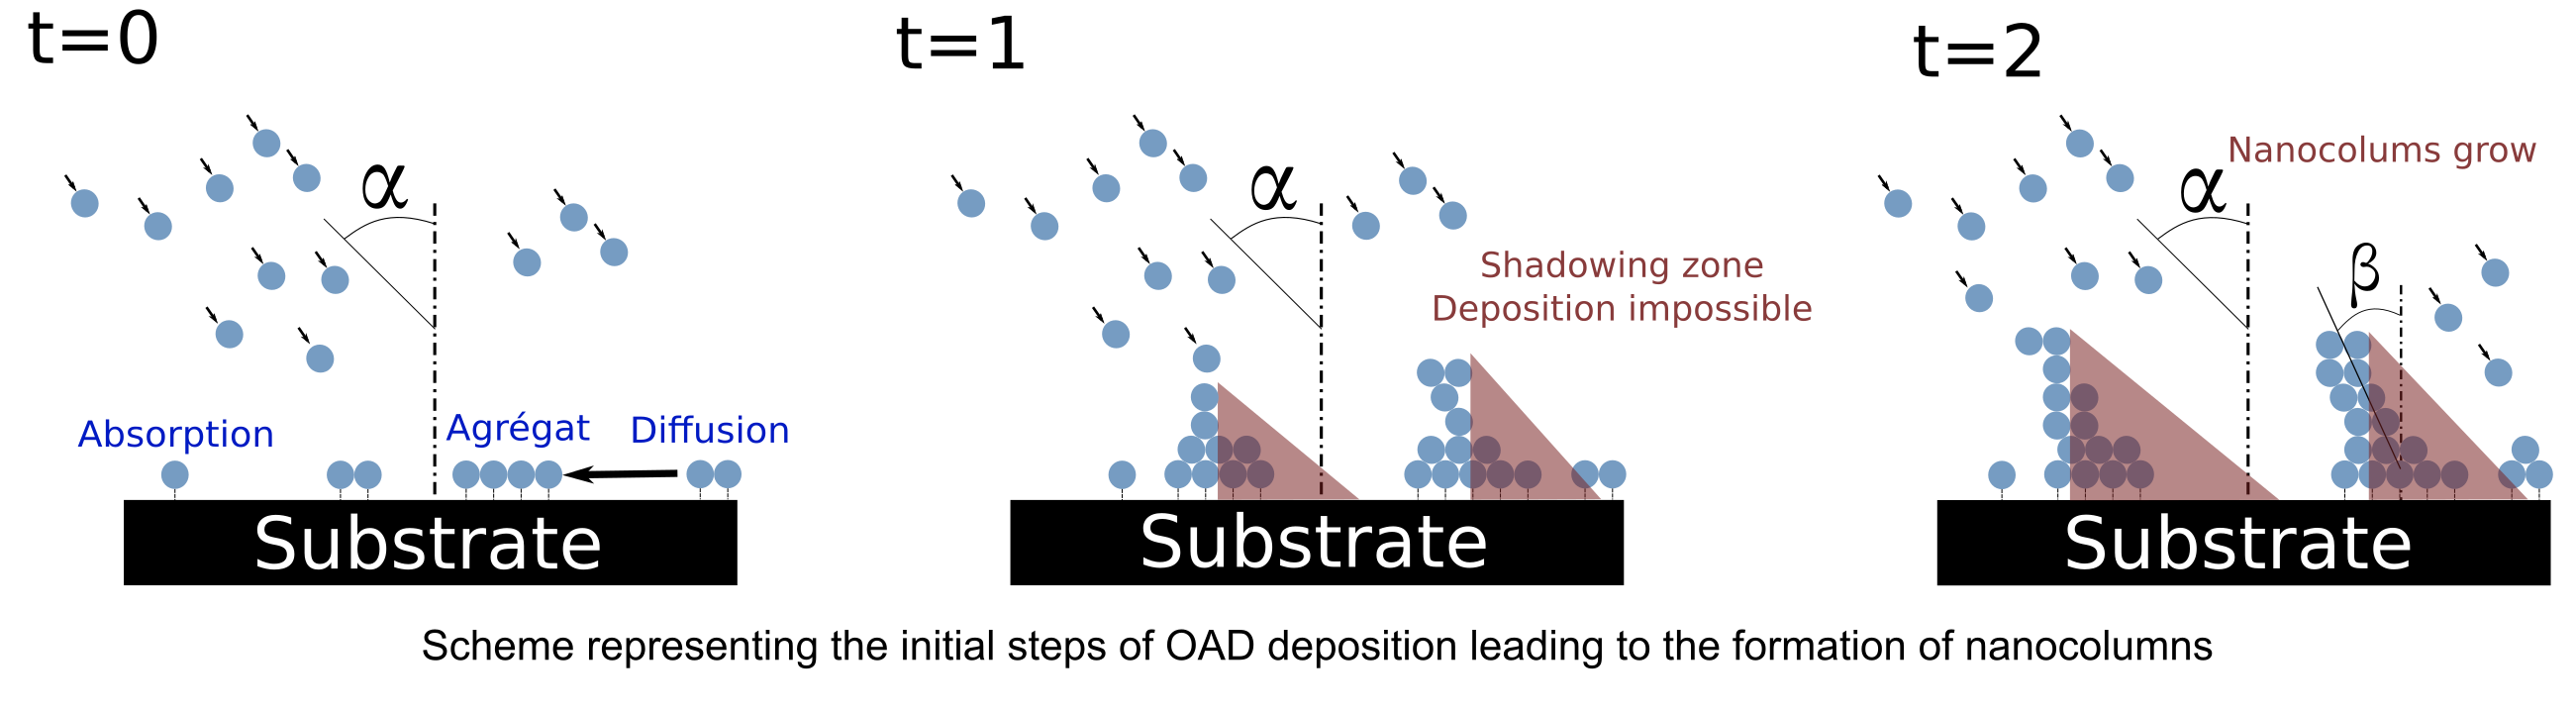

The early stages of deposition (t=0) follow the same growth mechanisms as those of a normal incidence PVD deposition (absorption, diffusion, coalescence of adatoms forming aggregates...). During growth, the aggregates are formed in islands. By geometric projection, a shadow area is formed beyond these islets preventing the deposition of new species (t=1).  The larger islets are more likely to grow, thereby increasing the shadowing effect (t=2). This is called competitive growth: the largest islands hide the smallest. As they continue to grow, these islets form nanocolumns.
It should be noted that a deposition developed with a deposition angle of α will produce nanocolumns with an angle of β<α by shadowing effect. On the other hand, the greater the angle of the α angle, the greater the shadowing effect. The spacing between the columns therefore increases with the deposition angle. This will lead to the formation of a porous layer. 

For example in the case of SiO2 deposited on a silicon substrate by OAD with α=70°, the following microstructure will be obtained:

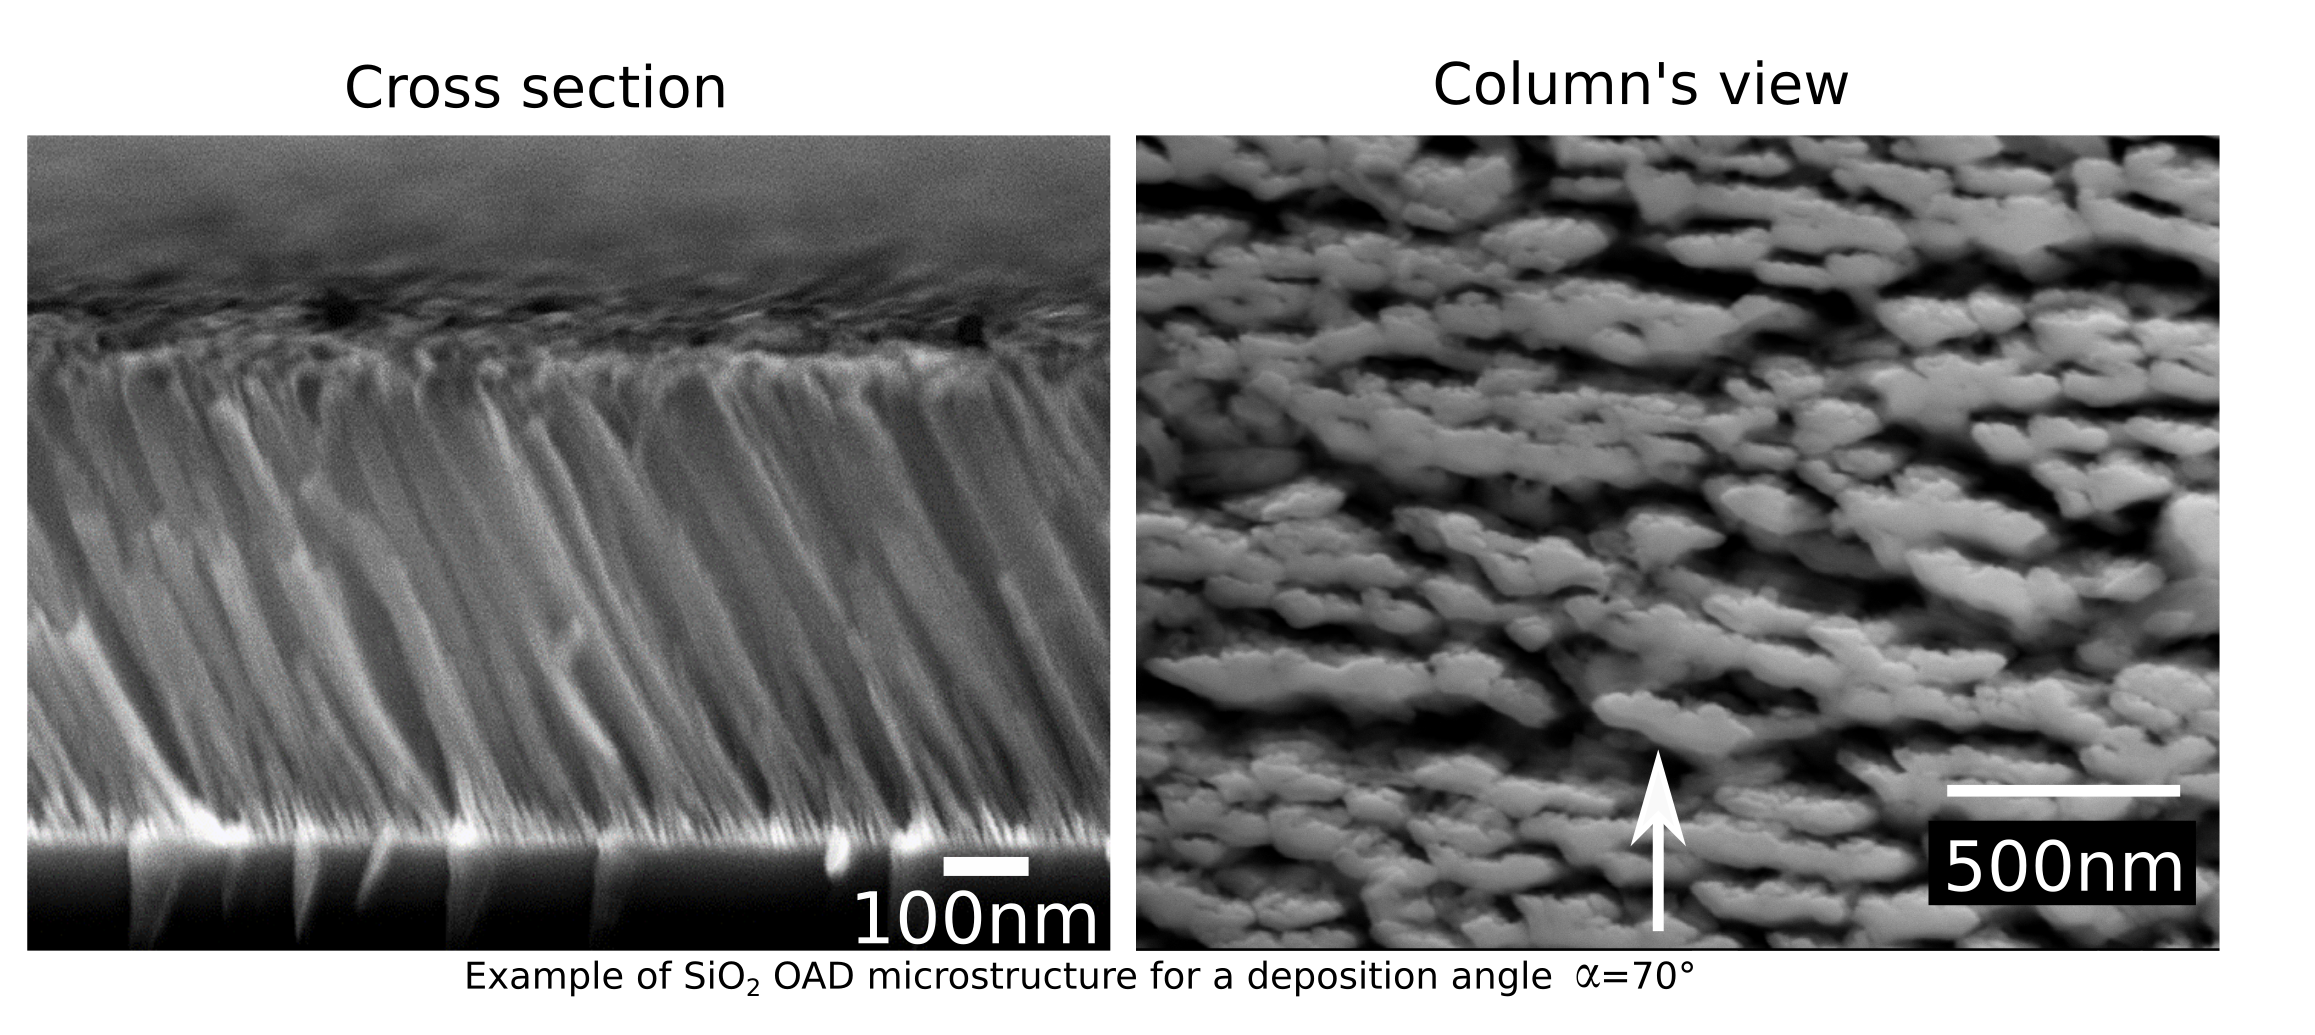

As it can be observe these columnar structures present a high level of porosity and anisotropy that will affect the optical properties. Modeling the optical properties of such layers can be made by using an anisotropic effective medium approximation like the anisotropic Bruggeman model. Bruggeman model consists in replacing the dielectric effect of the different porosity surrounding the columns with the action of an effective permittivity environment matrix, εeff. Determining this effective matrix resulting from the mixture of air and SiO2 is thus the key objective of the model. However to do so it necessary to measure first precisly the permettivity, or refractive index, of the SiO2.

<h2> Getting the dispersion law of a dense SiO2 layer </h2>

The first step of the analysis consists in determining the optical properties (dispersion laws) of the thin films obtained at α=0° and assumed to be a dense thin film. As the gap of SiO2 is far from the spectral range of interest, a simple Lorentz model was used to model the dispersion law [[2]]. For the rest of the study we will assume that the optical index of the condensed part of the nanostructured (porous) layers is that measured on the thin film made at α=0°. In this first part we use the data collected both from ellipsometry and spectrophotometry (Transmittance and Reflectance) to determine the dispersion law of SiO2 at α=0°. To this end a layer about 1800 nm of SiO2 was evaporated by e-beam at the same time on silicon (for elliposmetry) and on glass substrate (for spectrophotometry). Thus the analysis is only valid under the hypothesis that the optical properties of the SiO2 thin film is the same on silicon substrate as it is on glass substrate.

The model is constituted by the 3 parameters of the Lorentz oscillator (strength of the oscillator F, damping value of the oscillator and resonnance energy) and the thickness of the thin films.

First the values of the parameters are ajusted manually to have a relatively good match beween the measured data and the model. In a second time the function Auto Fit will use an algorithm (Levenberg–Marquardt) to minimize the error beween the model and the data by adjusting the parameters. Below is an interactive model that can be use to fit at the same time ellipsometric and spectrophotometric data. The resulting refractive index of the SiO2 layer is also plotted below.


[1]: https://doi.org/10.1002/9781118847510  "M. M. Hawkeye, M. T. Taschuk, and M. J. Brett, Glancing Angle Deposition of Thin Films, no. April. Chichester, UK: John Wiley & Sons, Ltd, 2014"

[2]: https://doi.org/10.1002/9780470060193 "H. Fujiwara, Spectroscopic Ellipsometry. Chichester, UK: John Wiley & Sons, Ltd, 2007"

<hr>

In [2]:
import T_R_elli as tre
import numpy as np
import math
import random
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle
from scipy.interpolate import interp1d
%matplotlib inline

def first(the_iterable,lim):
    for i in range(0,len(the_iterable)):
        if (the_iterable[i]>=lim-(lim/100)):
            return i

#----Initiating wavelength, Transmitance and reflectance data by reading data from file----#
tlam=[]
tR=[]
tT=[]
my_data = np.genfromtxt('T_R_SiO2.csv', delimiter=';')
for i in range(len(my_data)):
    tlam.append(my_data[i][0]*1e-9)#convert input wavelength from nm to m
    tT.append(my_data[i][1])
    tR.append(my_data[i][2])

#wavelength extremum are extracted from file, number of point is a parameter
lam_min=min(tlam) #minimum wavelength in m from data
lam_max=max(tlam)#maximum wavelength in m from data
nb=int(len(tlam)/2) #number of frequency points set to half number of data point for calculation time reasons
lam,E=tre.wavelength(lam_min,lam_max,nb)
interpoled_T = interp1d(tlam, tT, kind='linear')
interpoled_R= interp1d(tlam, tR, kind='linear')
T_e=interpoled_T(lam)
R_e=interpoled_R(lam)



#----Reading ellipsometric data from file----#
tlam=[]
tdel=[]
tpsi=[]
my_data = np.genfromtxt('Elli_SiO2.csv', delimiter=';')
for i in range(len(my_data)):
    tlam.append(my_data[i][0]*1e-9)#convert input wavelength from nm to m
    tpsi.append(my_data[i][1])
    tdel.append(my_data[i][2])


interpoled_psi = interp1d(tlam, tpsi, kind='linear')
interpoled_delta= interp1d(tlam, tdel, kind='linear')

psi_e=interpoled_psi(lam)
delta_e=interpoled_delta(lam)

tlam=[]
tn=[]
tk=[]

#----Reading n&k Si data from file----#
my_data = np.genfromtxt('Si.csv', delimiter=';')
for i in range(len(my_data)):
    tlam.append(my_data[i][0]*1e-9)#convert input wavelength from nm to m
    tn.append(my_data[i][1])
    tk.append(my_data[i][2])

interpoled_n = interp1d(tlam, tn, kind='linear')
interpoled_k= interp1d(tlam, tk, kind='linear')
nsub=interpoled_n(np.linspace(lam_min,lam_max,nb))
ksub=interpoled_k(np.linspace(lam_min,lam_max,nb))
n_i=np.linspace(1,1,nb)
NSi=nsub+ksub*1j

tlam=[]
tn=[]
tk=[]
#----Reading n&k Glass data from file----#
my_data = np.genfromtxt('Glass.csv', delimiter=';')
for i in range(len(my_data)):
    tlam.append(my_data[i][0]*1e-9)#convert input wavelength from nm to m
    tn.append(my_data[i][1])
    tk.append(my_data[i][2])

interpoled_n = interp1d(tlam, tn, kind='linear')
interpoled_k= interp1d(tlam, tk, kind='linear')
nsub=interpoled_n(np.linspace(lam_min,lam_max,nb))
ksub=interpoled_k(np.linspace(lam_min,lam_max,nb))
n_i=np.linspace(1,1,nb)
NGlass=nsub+ksub*1j


#Creating a function that use thickness and Lorentz oscillator parameters on Si substrate as input and gives Psi and Delta as output 
def fit(d,F,gamma,E0):
    #global my_layer, my_substrate
    tre.clearlayer()
    tre.my_layer(tre.Lorentz(F,gamma,E0,E),d)
    d2=1e-3 #thickness of the substrate
    tre.my_sub(NSi,d2,math.radians(65))
    psidelta=tre.psidelb()
    return {'psi': np.tan(psidelta['psi']), 'delta': np.cos(psidelta['delta'])}

#Creating a function that use thickness and Lorentz oscillator parameters on Glass substrate as input and gives Transmittance and Reflectance as output
def fit2(d,F,gamma,E0):
    tre.clearlayer()
    #creating Lorentz oscillator layer
    #The Lorentz parameter are the same used for the Si sample.
    #The thickness used is the same as for the sample deposited on silicon with a .985 factor. 
    #This factor is present to take into account the offset of the sample in the deposition setup.
    tre.my_layer(tre.Lorentz(F,gamma,E0,E),d*0.985)
    
    d2=1e-3 #thickness of the substrate
    tre.my_sub(NGlass,d2,math.radians(0))
    TR=tre.T_R()
    return {'T': [TR['Ts'][i] for i in range(nb)], 'R': [TR['Rp'][i] for i in range(nb)]}


#----Creating the interactive plot----#

#Set the interactive sliders
d_widget = widgets.FloatSlider(1900,min=0, max=2200, step=10,description='Th (nm)',continuous_update=False)
F_widget = widgets.FloatSlider(12,min=0.0, max=50, step=1,description='F (eV)',continuous_update=False)
gamma_widget = widgets.FloatSlider(0,min=0.0, max=1, step=0.1,description='Gamma (eV)',continuous_update=False)
E0_widget = widgets.FloatSlider(12,min=0.0, max=50, step=1,description='E0 (eV)', continuous_update=False)


#----Defining the plotting function taking the interactive parameters as input----#
def plotFit(d,F,gamma,E0):
    global esp_denseSiO2
    plt.rc('axes', labelsize=18)
    f,(ax1,ax2)=plt.subplots(1,2)
    f.set_size_inches(15.5, 6.5, forward=True)
    res=fit(d,F,gamma,E0)
    
    #----Plotting ellipsometry----#
    ax1.plot(lam*1e9,res['delta'],'-.',color="xkcd:black",label='Model')
    ax1.plot(np.asarray(lam)*1e9,delta_e,color="xkcd:blue",label='Δ')
    ax1.plot(lam*1e9,res['psi'],'-.',color="xkcd:black")
    ax1.plot(np.asarray(lam)*1e9,psi_e,color="xkcd:red",label='Ψ')
    ax1.set_xlabel("Wavelength (nm)")
    ax1.set_ylabel("Tan(Ψ),Cos(Δ)")
    ax1.legend(prop={'size': 18})
    
    res2=fit2(d,F,gamma,E0)
    
    #----Plotting Transmittance and Reflectance----#
    ax2.set_xlabel('Wavelength (nm)',fontsize=22)
    ax2.set_ylabel('Transmittance',fontsize=22,color="xkcd:red")
    ax2.plot(lam*1e9,T_e,color="xkcd:red",label='T')
    ax2.plot(lam*1e9,res2['T'],'-.',color="xkcd:black",label='Model')
    ax2.set_ylim([0.85,0.96])
    ax2.legend(loc='upper left',prop={'size': 15})

    ax3=ax2.twinx()
    ax3.set_ylabel('Reflectance',fontsize=22,color='xkcd:blue')
    ax3.plot(lam*1e9,R_e,color="xkcd:blue",label='R')
    ax3.plot(lam*1e9,res2['R'],'-.',color="xkcd:black",label='Model')
    ax3.set_ylim([0.04,0.14])
    ax3.legend(loc='lower right',prop={'size': 15})
    f.tight_layout()
    plt.show()
    
    #----Plotting refractive index and extinction coefficient----#
    fig, ax1 = plt.subplots()
    fig.set_size_inches(15.5, 3.5, forward=True)
    ax1.plot(lam*1e9,tre.n(tre.Lorentz(F,gamma,E0,E)),color="xkcd:red")
    ax1.set_xlabel("Wavelength (nm)")
    ax1.set_ylabel("Refractive index", fontsize=18)
    ax2=ax1.twinx()
    ax2.plot(lam*1e9,tre.k(tre.Lorentz(F,gamma,E0,E)),color="xkcd:black")
    ax2.set_ylabel("Extinction coefficient", fontsize=18)
    ax2.set_ylim([-0.01,0.5])
    plt.show()
    esp_denseSiO2=tre.Lorentz(F,gamma,E0,E)

#----Defining the interactive plot and auto fit option ----#
interactive_plot = interactive(plotFit,d=d_widget,F=F_widget,gamma=gamma_widget,E0=E0_widget)
output = interactive_plot.children[-1]
button = widgets.Button(description='Auto Fit')
out = widgets.Output()

#----Creating the Auto Fit function----#
def on_button_clicked(b):
    func1=lambda tpl : fit(tpl[0],tpl[1],tpl[2],tpl[3])['delta']
    func2=lambda tpl : fit(tpl[0],tpl[1],tpl[2],tpl[3])['psi']
    func3=lambda tpl : fit2(tpl[0],tpl[1],tpl[2],tpl[3])['T']
    func4=lambda tpl : fit2(tpl[0],tpl[1],tpl[2],tpl[3])['R']
    #The function to be minimized
    Error_matrix=lambda tpl,psi_e,delta_e,T_e,R_e: 1/(4*len(delta_e)-len(tpl)+1)*((func1(tpl)-delta_e)**2+(func2(tpl)-psi_e)**2+(func3(tpl)-T_e)**2+(func4(tpl)-R_e)**2) 
    #initial parameters
    tplInitial1=(interactive_plot.kwargs['d'],interactive_plot.kwargs['F'],interactive_plot.kwargs['gamma'],interactive_plot.kwargs['E0'])
    # leastsq finds the set of parameters in the tuple tpl that minimizes Error matrix which sum is the MSE
    tplFinal1,success=leastsq(np.sum(Error_matrix),tplInitial1,args=(psi_e,delta_e,T_e,R_e),maxfev=20)
    with out:
        d_widget.value=tplFinal1[0]
        F_widget.value=tplFinal1[1]
        gamma_widget.value=tplFinal1[2]
        E0_widget.value=tplFinal1[3]
button.on_click(on_button_clicked)
display(widgets.VBox([button,out]))
interactive_plot

interactive(children=(FloatSlider(value=1900.0, continuous_update=False, description='Th (nm)', max=2200.0, st…

<hr>

<h2> Simulating a SiO2 layer deposited by OAD with α=70° using a complex optical model</h2>

Now that we have measured and simulated the SiO2 dispersion law we can build a model to simulate the optical properties of a nanostructured SiO2. As stated before the OAD layer presented here are heterogenous material composed of dense columns (SiO2) and porosity (air). To simulate the effective refractive index resulting from this mixture the Bruggeman effective medium approximation is used. Knowing the dispersion law of SiO2 and of air (n=1) we can calculate the resulting effective refractive index for a porosity rate P. 

Furthermore as demonstrated in our paper the growth process of OAD will produce nanocolumns with an anisotropic broadening of the section and an increasing porosity rate for an increasing thickness [insert article]. To take into account this evolution the single OAD layer is decomposed in 10 layer with a varying porosity rate. This porosity rate variation can be controlled with 3 points (P_bot, P_mid, P_top) that leads to a 2 segement evolution of porosity, the first segement being P1-P2 and the second P2-P3. This 2 segment evolution is based on microstructural characterisation of the thin film [insert article]. 

To take the anisotropy into account we simulate the OAD thin films with an anisotropic Bruggeman model. This model introduce 3 depolarization factors on top of the porosity. Indirectly these factors represent the shape of the inclusion. For simplification we consider the depolarization coefficient Lz'=0 that represent very elongated structures (as our columns along their long axis). The anisotropy can then be simulated with a parameter expressing the pourcentage split value of Lx' and Ly': for example (for x'y'split=20% Lx=20%, Ly=80% or for x'y'split =50% Lx=Ly) . Finally as the column are tilted with an angle β from the laboratory referential an Euler transformation of the angle β is applied on the anisotropic matrix.

Below is a picture that summerizes the optical model:

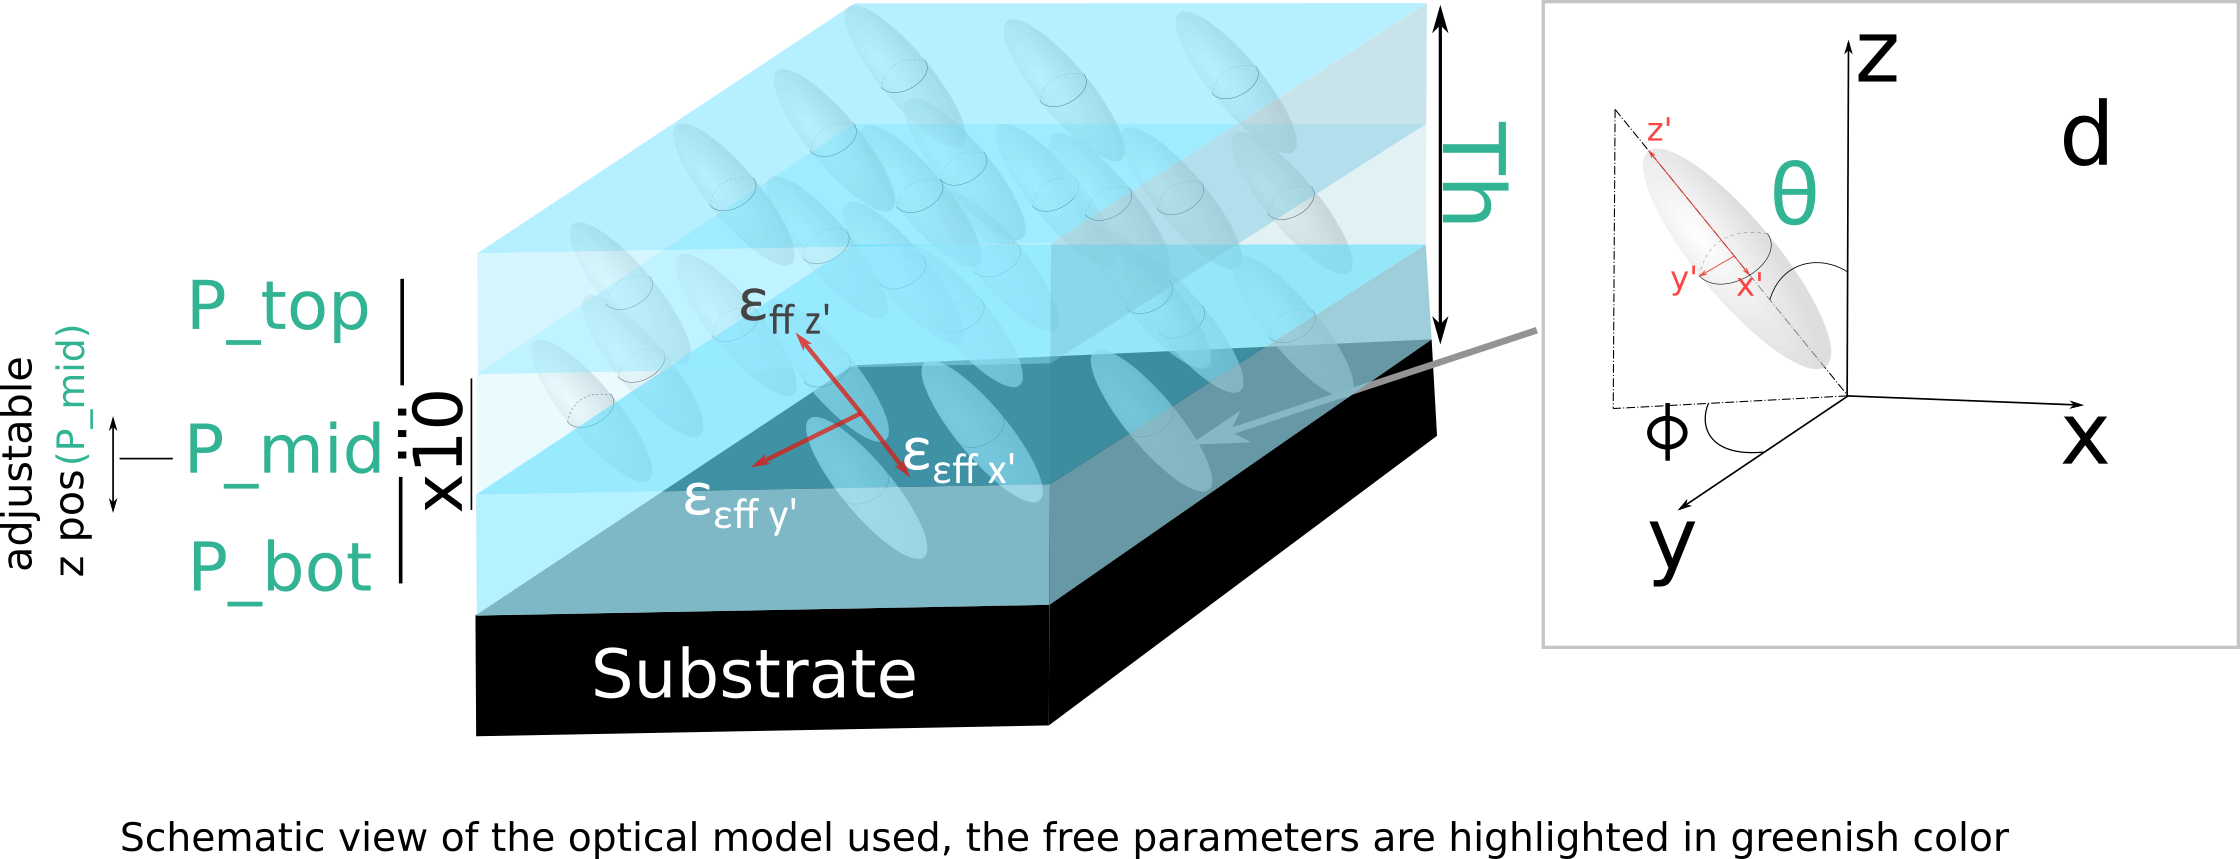

To probe the anisotropy of the sample generalized ellipsometry data is used and the Muller matrix coefficient are measured. The off-diagonal coefficient of the Muller matrix are sensitive to the anisotropy of the layer. The optical model decribe previously can be simulated and compared to this data. To do so the transfert matrix method is computed using Berreman's formalism.

To make a reliable fit and disentangle the different parameters one would need to include generalized ellipsometric data of different incidence angle (theta) and azimutal angle (phi) as we did in the paper associated with this notebook ([insert article]). However in the context of this notebook this would represent too much data to fit. Here we use the code to illustrate reliability of our model on generalized ellipsometric data for one incidence angle (65°) and one azimutal angle (phi=315°). The parameters presented here are initiated from an external fit.

To illustrate how it is possible from this model to dertermine microstructural information from this model an 'artistic' representation of the thin film simulated with the corresponding parameters is presented. On the schematic representation the angle value of the columns and the aspect ratio of the ellipse correspond to the fitted values, however the porosity is a crude approximation. 

It can be observed that the model fits the data with good accruacy. It is also interesting to note that each modification of a parameter will deviate the model from its initial 'optimal' solution.

`(After fitting the SiO2 refractive index this cell needs to be updated (Click on it and press Shift+ Enter) `

<hr>

In [5]:
tlam=[]
tM12=[]
tM21=[]
tM22=[]
tM33=[]
tM34=[]
my_data = np.genfromtxt('SiO2_OAD_MullerDiag.csv', delimiter=';')
for i in range(len(my_data)):
    tlam.append(my_data[i][0])#convert input wavelength from nm to m
    tM12.append(my_data[i][1])
    tM21.append(my_data[i][2])
    tM22.append(my_data[i][3])
    tM33.append(my_data[i][4])
    tM34.append(my_data[i][5])
    
tlam=[]
tM13=[]
tM14=[]
tM23=[]
tM24=[]
tM31=[]
tM32=[]
my_data = np.genfromtxt('SiO2_OAD_MullerOffDiag.csv', delimiter=';')
for i in range(len(my_data)):
    tlam.append(my_data[i][0])#convert input wavelength from nm to m
    tM13.append(my_data[i][1])
    tM14.append(my_data[i][2])
    tM23.append(my_data[i][3])
    tM24.append(my_data[i][4])
    tM31.append(my_data[i][5])
    tM32.append(my_data[i][6])
    
    
def fitMul(d,p1,p2,p3,mid,theta_E,dep_ax):
    global esp_denseSiO2
    d2=1e-3 #thickness of the substrate
    epsm=esp_denseSiO2
    epsp=np.linspace(1,1,nb)
    nb_layer=10;
    porosity=interp1d([0,mid,1],[p1,p2,p3], kind='linear')
    tre.clearlayer()
    d2=1e-3 #thickness of the substrate
    tre.my_sub(NSi,d2,math.radians(65))
    #Hashing the whole stack in 10 layers with different porosity level
    for j in range(nb_layer):
        #Defining anisotropic layer using true use for anisotropic layer
        tre.my_layer(tre.anisotrope(tre.Bruggeman(esp_denseSiO2,epsp,porosity(j/nb_layer),dep_ax,0),phi_E=math.radians(135),theta_E=theta_E),d/nb_layer,anis=True)
    return {'Mnr': tre.Mnjr(), 'porosity':porosity}

#----Setting parameter sliders----#
dn_widget = widgets.FloatSlider(536,min=0, max=600, step=50,description='Th (nm)',continuous_update=False)
p1_widget = widgets.FloatSlider(30,min=1, max=99, step=5,description='P_bot (%)',continuous_update=False)
p2_widget = widgets.FloatSlider(38,min=1, max=99, step=5,description='P_mid (%)',continuous_update=False)
p3_widget = widgets.FloatSlider(43.3,min=1,max=99,step=5,description='P_top(%)',continuous_update=False)
mid_widget = widgets.FloatSlider(10,min=1,max=99,step=5,description='Pm_pos(%)',continuous_update=False)
theta_E_widget = widgets.FloatSlider(25.39,min=0.0,max=89,step=0.1,description='β(°)',continuous_update=False)
dep_ax_widget = widgets.FloatSlider(28,min=10,max=99.0,step=5,description='x\'y\' split (%)',continuous_update=False)

Off_Diag=[[0,2],[0,3],[1,2],[1,3],[2,0],[2,1]]
Diag=[[0,1],[1,0],[1,1],[2,2],[2,3]]

#----Creating the interactive plot----#
def plotFit2(d,p1,p2,p3,mid_w,theta_E,dep_ax):
    f,(ax1,ax2)=plt.subplots(1,2)
    f.set_size_inches(18, 3.5, forward=True)
    res=fitMul(d,p1/100,p2/100,p3/100,mid_w/100,math.radians(theta_E),dep_ax/100)
    Mullerres=res['Mnr']
    porosityres=res['porosity']
    
    #----Plotting Muller Bloc Diagonal Elements----#
    ax1.plot(tlam,tM12,label='M12')
    ax1.plot(tlam,tM21,label='M21')
    ax1.plot(tlam,tM22,label='M22')
    ax1.plot(tlam,tM33,label='M33')
    ax1.plot(tlam,tM34,label='M34')
    for x in Diag:
        ax1.plot(lam*1e9,[np.real(Mullerres[k][x[1],x[0]]) for k in range(len(Mullerres))],'-.',color='xkcd:black')
    ax1.set_xlabel("Wavelength (nm)",fontsize=18)
    ax1.set_ylabel("Mueller Bloc Diagonal",fontsize=18)
    ax1.set_xlim([350,1650])
    ax1.legend()
    
    #----Plotting Muller Bloc Off-Diagonal Elements----#
    ax2.plot(tlam,tM13,label='M13')
    ax2.plot(tlam,tM14,label='M14')
    ax2.plot(tlam,tM23,label='M23')
    ax2.plot(tlam,tM24,label='M24')
    ax2.plot(tlam,tM31,label='M31')
    ax2.plot(tlam,tM32,label='M32')
    
    for x in Off_Diag:
        ax2.plot(lam*1e9,[np.real(Mullerres[k][x[1],x[0]]) for k in range(len(Mullerres))],'-.',color='xkcd:black')
    ax2.set_xlabel('Wavelength (nm)',fontsize=18)
    ax2.set_ylabel('Mueller Bloc Off-Diagonal',fontsize=18)
    ax2.set_xlim([350,1650])
    ax2.legend()
    #plt.show()
    
    #----Plotting the porosity profile----#
    f2,(ax3,ax4,ax5)=plt.subplots(1,3)
    f2.set_size_inches(15, 5, forward=True)
    ax3.plot(100*porosityres(np.linspace(0,1,10)),np.linspace(d/10,d,10),'-s')
    ax3.set_ylabel('z (nm)')
    ax3.set_xlabel("Porosity (%)")
    ax3.set_ylim(-100, 600)

    #----Plotting the nanocolumns cross section----#
    NUM=30
    h=2*d/np.cos(math.radians(theta_E))
    mid=mid_w
    porosity=interp1d([0,mid/100*h,h],[p1/100,p2/100,p3/100], kind='linear')
    z=np.linspace(0,h,NUM)
    KillNum=NUM*max(porosity(z))
    colz=[]
    for i in range(int(KillNum)):
        colz.append(z[first(porosity(z)*NUM,i)])
    for i in range(NUM-int(KillNum)):
        colz.append(h)
    random.Random(10).shuffle(colz)
    w=20
    x=(w+((w)*np.sin(math.radians(theta_E))))
    rect=Rectangle(xy=(0,-100),width=600,height=100,fill=True)
    ells = [Ellipse(xy=(i*x,0),
                    width=w, height=colz[i],
                    angle=theta_E)for i in range(NUM)]

    ax4.text(300,-50, 'Substrate',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='white')
    
    ax4.text(300,650, 'Cross section',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black')
    for e in ells:
        ax4.add_artist(e)
        e.set_clip_box(ax4.bbox)
        e.set_facecolor('xkcd:muted blue')
    rect.set_facecolor('xkcd:black')
    ax4.add_artist(rect)
    ax4.set_xlim(0, 600)
    ax4.set_ylim(-100, 600)
    ax4.set_xlabel('x (a.u)')
    ax4.set_ylabel("z(nm)")
    
    #----Plotting the nanocolumn top view----#
    NUM=1000
    e=(dep_ax/100)/(1-(dep_ax/100))
    lb=5
    la=lb*e


    x=(la+((la)*np.sin(math.radians(theta_E))))
    y=lb
    ells = [Ellipse(xy=(la/2+i//25*x,lb/2+np.mod(i,25)*y),
                        width=la, height=lb,
                        angle=0)for i in range(NUM)]
    ax5.text(max(x*3,lb*3)/2,max(x*3,lb*3)+20/max(x*3,lb*3), 'Column\'s view',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black')
    for e in ells:
            ax5.add_artist(e)
            e.set_clip_box(ax5.bbox)
            e.set_facecolor('xkcd:muted blue')
            ax5.set_ylim(0,max(x*3,lb*3))
            ax5.set_xlim(0,max(x*3,lb*3))
            ax5.set_xlabel('x\' (a.u)')
            ax5.set_ylabel('y\' (a.u)')
    f2.tight_layout()
    
    plt.show()
interactive_plot2 = interactive(plotFit2,d=dn_widget,p1=p1_widget,p2=p2_widget,p3=p3_widget,mid_w=mid_widget,theta_E=theta_E_widget,dep_ax=dep_ax_widget)
output = interactive_plot2.children[-1]
interactive_plot2

interactive(children=(FloatSlider(value=536.0, continuous_update=False, description='Th (nm)', max=600.0, step…

<hr>

<center><h2> References </h2></center>

More informations and other examples of the code are available at https://github.com/Quikim/Optic_lab

Supplementary information on oblique angle deposition can be found in [[1]] 

Supplementary information on the transfert matrix model for anisotropic layer is given in [[2]] ,[[3]]

[ 1 ] M. M. Hawkeye, M. T. Taschuk, and M. J. Brett, Glancing Angle Deposition of Thin Films, no. April. Chichester, UK: John Wiley & Sons, Ltd, 2014

[ 2 ]	H. Fujiwara, Spectroscopic Ellipsometry. Chichester, UK: John Wiley & Sons, Ltd, 2007.

[ 3 ]	M. Losurdo and K. Hingerl, Ellipsometry at the Nanoscale. Berlin, Heidelberg: Springer Berlin Heidelberg, 2013.

[1]: https://doi.org/10.1002/9781118847510  "M. M. Hawkeye, M. T. Taschuk, and M. J. Brett, Glancing Angle Deposition of Thin Films, no. April. Chichester, UK: John Wiley & Sons, Ltd, 2014"
[2]: https://doi.org/10.1002/9780470060193 "H. Fujiwara, Spectroscopic Ellipsometry. Chichester, UK: John Wiley & Sons, Ltd, 2007"
[3]:https://doi.org/10.1007/978-3-642-33956-1 "M. Losurdo and K. Hingerl, Ellipsometry at the Nanoscale. Berlin, Heidelberg: Springer Berlin Heidelberg, 2013."